In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset
df = pd.read_csv("CarsData.csv")

In [5]:
# Display the first five rows
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [7]:
#Display the last five rows
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall
97711,Grandland X,2019,15798,Manual,10586,Diesel,150,48.7,1.5,vauxhall


In [9]:
# Get column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [11]:
# Check the number of rows and columns
df.shape

(97712, 10)

In [13]:
# List all column names
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

In [15]:
# Count missing values in each column
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [17]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,97712.0,2017.066502,2.118661,1970.0,2016.0,2017.0,2019.0,2024.0
price,97712.0,16773.487555,9868.552222,450.0,9999.0,14470.0,20750.0,159999.0
mileage,97712.0,23219.475499,21060.882301,1.0,7673.0,17682.5,32500.0,323000.0
tax,97712.0,120.142408,63.357250,0.0,125.0,145.0,145.0,580.0
mpg,97712.0,55.205623,16.181659,0.3,47.1,54.3,62.8,470.8
engineSize,97712.0,1.664913,0.558574,0.0,1.2,1.6,2.0,6.6


In [19]:
#Check for Duplicates
df.duplicated().sum()

0

In [21]:
#Identify garbage values
import warnings
warnings.filterwarnings("ignore")  

print(df.describe().T) 

              count          mean           std     min     25%      50%  \
year        97712.0   2017.066502      2.118661  1970.0  2016.0   2017.0   
price       97712.0  16773.487555   9868.552222   450.0  9999.0  14470.0   
mileage     97712.0  23219.475499  21060.882301     1.0  7673.0  17682.5   
tax         97712.0    120.142408     63.357250     0.0   125.0    145.0   
mpg         97712.0     55.205623     16.181659     0.3    47.1     54.3   
engineSize  97712.0      1.664913      0.558574     0.0     1.2      1.6   

                75%       max  
year         2019.0    2024.0  
price       20750.0  159999.0  
mileage     32500.0  323000.0  
tax           145.0     580.0  
mpg            62.8     470.8  
engineSize      2.0       6.6  


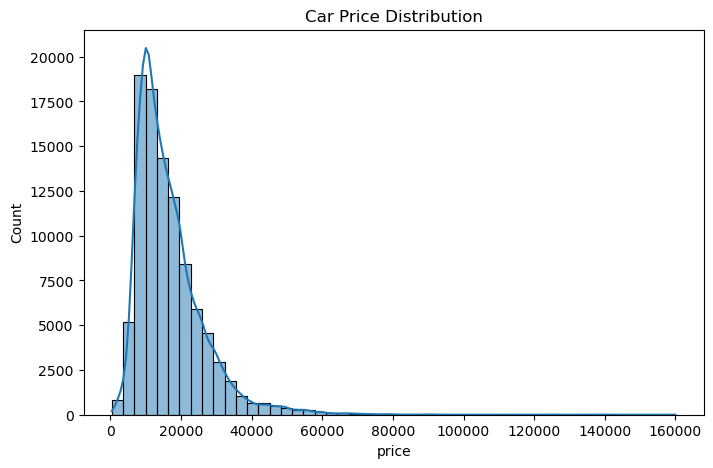

In [23]:
# Distribution of prices
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Car Price Distribution")
plt.show()

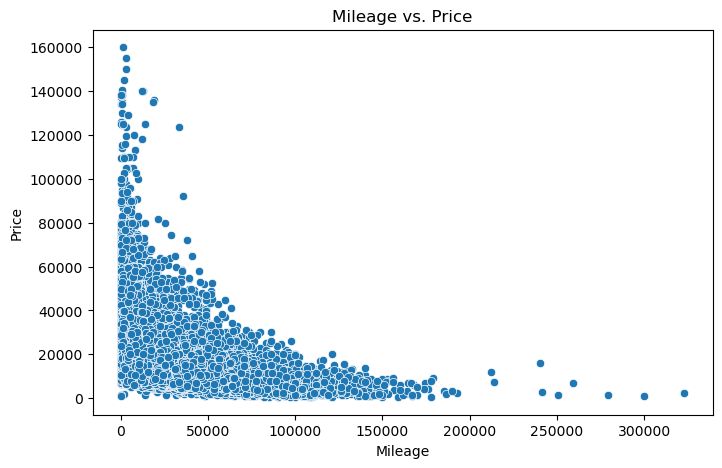

In [25]:
# Relationship between price and mileage
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['mileage'], y=df['price'])
plt.title("Mileage vs. Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

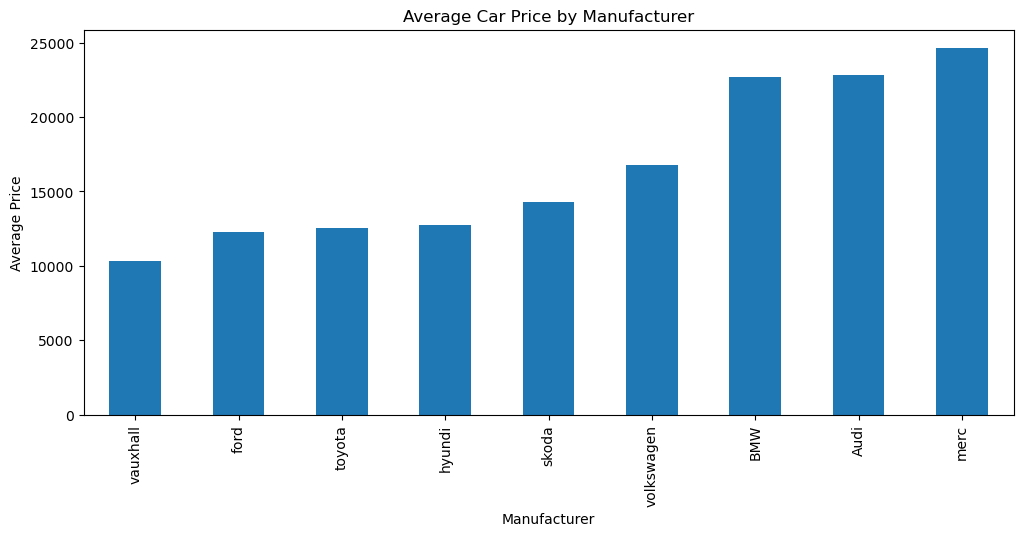

In [27]:
#Car Prices Across Different Manufacturers
plt.figure(figsize=(12, 5))
df.groupby("Manufacturer")["price"].mean().sort_values().plot(kind="bar")
plt.title("Average Car Price by Manufacturer")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

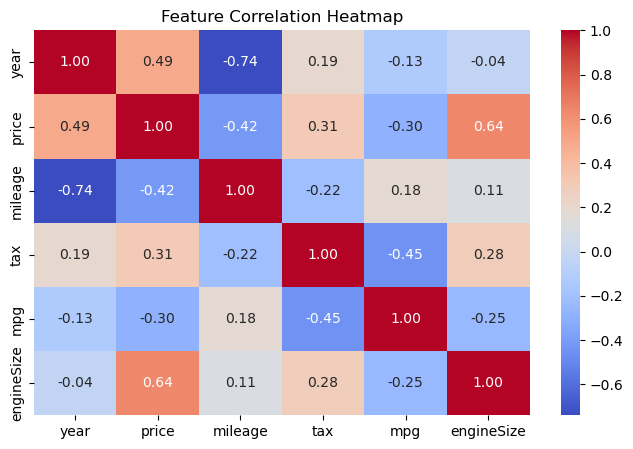

In [29]:
# Select only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])  

# Compute correlation matrix
corr_matrix = numeric_df.corr()  

# Plot correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
# Count missing values again
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

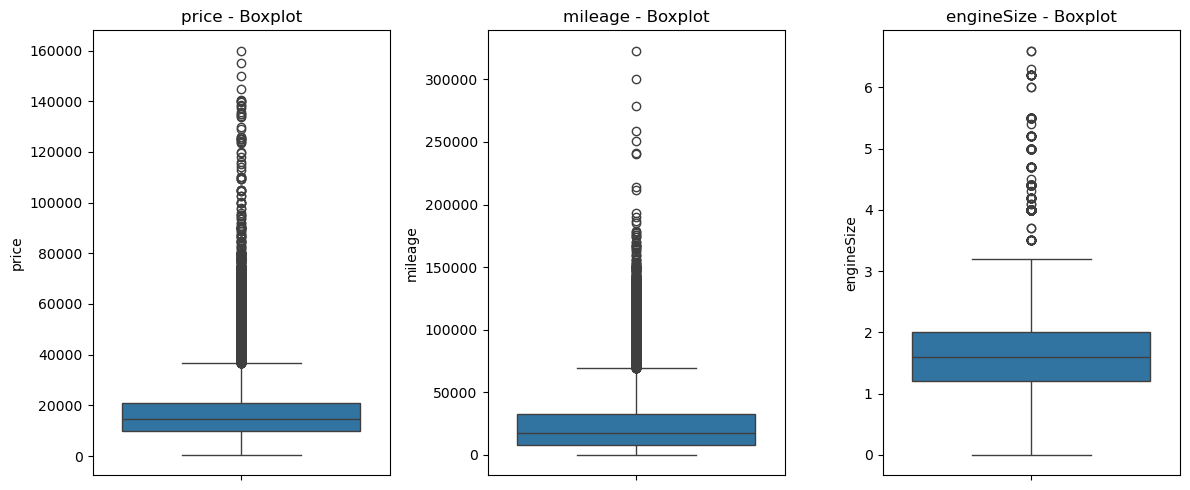

In [35]:
# Identify and visualize outliers using boxplots
numerical_cols = ['price', 'mileage', 'engineSize']
plt.figure(figsize=(12, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"{col} - Boxplot")

plt.tight_layout()
plt.show()

In [37]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal on numerical columns
for col in numerical_cols:
    df = remove_outliers(df, col)

# Check new dataset size
df.shape

(90047, 10)

In [39]:
df.select_dtypes(include=['object']).columns

Index(['model', 'transmission', 'fuelType', 'Manufacturer'], dtype='object')

In [41]:
df['model'].nunique()

175

In [43]:
df['model'].value_counts()

model
 Fiesta     6400
 Golf       4572
 Focus      4370
 C Class    3301
 Polo       3200
            ... 
 R Class       1
 Fox           1
 Amica         1
 Accent        1
220            1
Name: count, Length: 175, dtype: int64

In [45]:
model_counts = df['model'].value_counts()
df['model_encoded'] = df['model'].map(model_counts)

In [47]:
df.drop(columns=['model'], inplace=True)

In [49]:
df['Manufacturer'].nunique()

9

In [51]:
df['fuelType'].nunique()

5

In [55]:
df['transmission'].nunique()

4

In [57]:
# Convert categorical columns into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['fuelType', 'transmission', 'Manufacturer'], drop_first=True)

In [59]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_encoded,fuelType_Electric,fuelType_Hybrid,fuelType_Other,...,transmission_Other,transmission_Semi-Auto,Manufacturer_BMW,Manufacturer_ford,Manufacturer_hyundi,Manufacturer_merc,Manufacturer_skoda,Manufacturer_toyota,Manufacturer_vauxhall,Manufacturer_volkswagen
0,2017,7495,11630,145,60.1,1.0,1051,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2017,10989,9200,145,58.9,1.0,3200,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2019,27990,1614,145,49.6,2.0,1156,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,2017,12495,30960,150,62.8,2.0,449,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2017,7999,19353,125,54.3,1.2,6400,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90047 entries, 0 to 97711
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     90047 non-null  int64  
 1   price                    90047 non-null  int64  
 2   mileage                  90047 non-null  int64  
 3   tax                      90047 non-null  int64  
 4   mpg                      90047 non-null  float64
 5   engineSize               90047 non-null  float64
 6   model_encoded            90047 non-null  int64  
 7   fuelType_Electric        90047 non-null  bool   
 8   fuelType_Hybrid          90047 non-null  bool   
 9   fuelType_Other           90047 non-null  bool   
 10  fuelType_Petrol          90047 non-null  bool   
 11  transmission_Manual      90047 non-null  bool   
 12  transmission_Other       90047 non-null  bool   
 13  transmission_Semi-Auto   90047 non-null  bool   
 14  Manufacturer_BMW         90

In [63]:
#Normalize features
from sklearn.preprocessing import MinMaxScaler
num_cols = ['price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_encoded']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [65]:
# Verify the transformation
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
price,90047.0,0.412911,0.196777,0.0,0.255754,0.372443,0.530798,1.0
mileage,90047.0,0.301527,0.231464,0.0,0.113912,0.249413,0.442546,1.0
tax,90047.0,0.207965,0.104678,0.0,0.219298,0.254386,0.254386,1.0
mpg,90047.0,0.118064,0.033220,0.0,0.099469,0.117109,0.132837,1.0
engineSize,90047.0,0.499562,0.147398,0.0,0.375000,0.468750,0.625000,1.0
model_encoded,90047.0,0.326378,0.272098,0.0,0.110173,0.266760,0.498515,1.0
